Jacobi Method for Determining Potential in a Rectangular Region


The Jacobi method is an iterative algorithm used to solve systems of linear equations. It is particularly useful for solving partial differential equations (PDEs) on a discretized grid. In this context, we are solving the Laplace equation for the electric potential $V(x,y)$ in a rectangular region without any internal charge distribution.

The Laplace equation is given by:

$$\Delta^2V=0$$

For a discretized 2D grid, this can be approximated using finite differences as:

$$V_{i,j}=\frac{1}{4}(V_{i+1,j}+V_{i−1,j}+V_{i,j+1}+V_{i,j−1})$$

The Jacobi method updates the potential at each grid point by averaging the potential of its four nearest neighbors. This process is repeated iteratively until convergence is achieved.

The following code implements the Jacobi method to determine the potential $V(x,y)$ in a rectangular region with linear dimensions $L_x=21$ and $L_y​=21$, and a boundary potential $V=2$. The grid size is $\Delta x=\Delta y=0.5$, and the convergence criterion is an absolute precision of $10^{−4}$. Before writing the code, guess of the initial values was set to be 0.

Converged after 3958 iterations with a maximum difference of 9.97362e-05


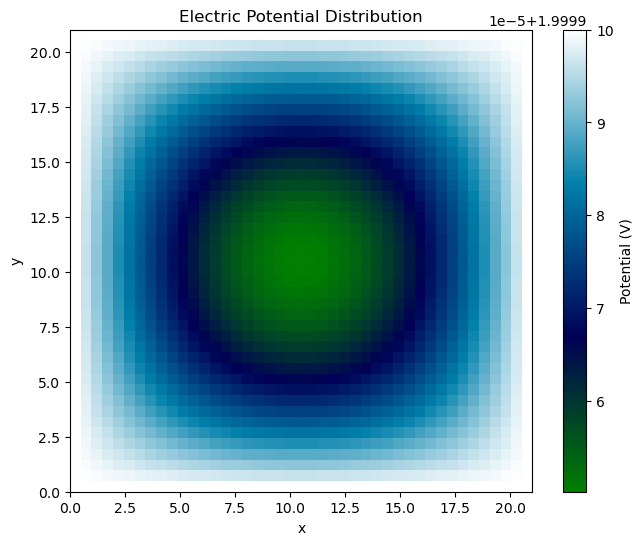

In [119]:
import numpy as np
import matplotlib.pyplot as plt
Lx,Ly=21,21
dx=dy=0.5
V_boundary=2
tolerance=1e-4
Nx=int(Lx/dx)+1
Ny=int(Ly/dy)+1
V=np.zeros((Nx, Ny))
V[:,0]=V_boundary 
V[:,-1]=V_boundary 
V[0,:]=V_boundary 
V[-1,:]=V_boundary 
def jacobi_iteration(V):
    V_new=V.copy()
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            V_new[i,j]=0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    return V_new
iterations=0
max_difference=tolerance
while max_difference>=tolerance:
    V_new=jacobi_iteration(V)
    max_difference=np.sum(np.abs(V_new-V))
    V=V_new
    iterations+=1
print(f"Converged after {iterations} iterations with a maximum difference of {max_difference:.5e}")
plt.figure(figsize=(8, 6))
plt.imshow(V_new, cmap="ocean", origin='lower', extent=[0,Lx,0,Ly])
plt.colorbar(label='Potential (V)')
plt.title('Electric Potential Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The method converged after a 3958 iterations, as indicated in the output. This number of iterations provides insight into the efficiency of the Jacobi method for this problem setup. The difference was 9.97362e-05. The final potential distribution is plotted using a color map, which visually represents how the potential varies within the rectangular region. The plot shows that the potential smoothly transitions from the boundaries (where it is fixed at 2) to the interior points.

For the next part, same code was used just dx and dy was changed from 0.5 to 0.25 and number of iterations was measured.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
Lx, Ly=21,21
dx=dy=0.25
V_boundary=2
tolerance=1e-4
Nx=int(Lx/dx)+1
Ny=int(Ly/dy)+1
V=np.zeros((Nx, Ny))
V[:, 0]=V_boundary  
V[:, -1]=V_boundary 
V[0,:]=V_boundary 
V[-1,:]=V_boundary  
def jacobi_iteration(V):
    V_new = V.copy()
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            V_new[i,j]=0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i,j-1])
    return V_new
iterations=0
sum_difference=tolerance
while sum_difference>=tolerance:
    V_new=jacobi_iteration(V)
    sum_difference=np.sum(np.abs(V_new - V))
    V=V_new
    iterations+=1
print(f"Converged after {iterations} iterations with a sum difference of {sum_difference:.5e}")


Converged after 15839 iterations with a sum difference of 9.99869e-05


The method converged after a 15839 iterations, as indicated in the output.

For the next part the initial charges ar the interior sites was set to be zero except for the central sites whose charge is set equal to 2C. For this rho matrix was created, as charge distribution matrix. In the center of this matrix  charge density would be: rho[Nx//2, Ny//2]=C/(dx*dy). Other parameters were same. epsilon_0 was set to 1 for simplicity.

Converged after 3946 iterations with a sum difference of 9.99167e-05


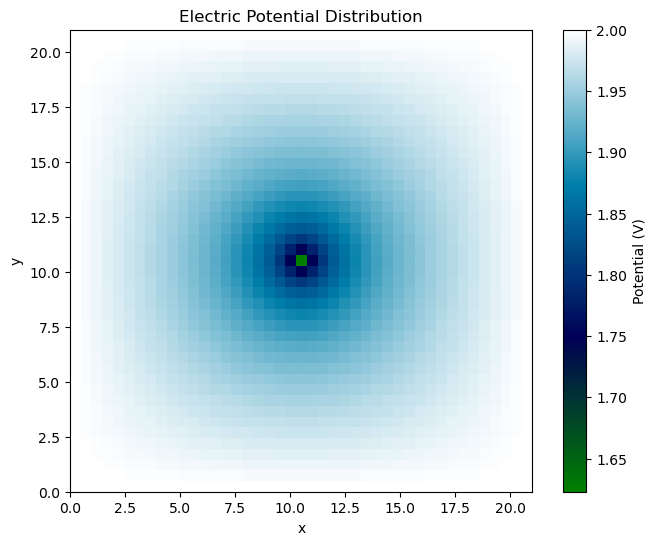

In [108]:
import numpy as np

Lx,Ly=21, 21
dx=dy=0.5
V_boundary=2
tolerance=1e-4
epsilon_0=8.854e-12 
C=2
Nx=int(Lx/dx) + 1
Ny=int(Ly/dy)+ 1
V=np.zeros((Nx, Ny))

rho = np.zeros((Nx, Ny))
rho[Nx//2, Ny//2]=C/(dx*dy)
V[:, 0]=V_boundary  
V[:, -1]=V_boundary  
V[0, :]=V_boundary  
V[-1, :]=V_boundary 

def jacobi_iteration(V, rho, dx, dy, epsilon_0):
    V_new = V.copy()
    for i in range(1, Nx-1):
        for j in range(1,Ny-1):
            V_new[i, j] = 0.25*(V[i+1,j]+V[i-1,j]+V[i,j+1]+V[i, j-1]-(dx*dy)**2*rho[i, j])
    return V_new
iterations = 0
sum_difference = tolerance
while sum_difference >= tolerance:
    V_new = jacobi_iteration(V, rho, dx, dy, epsilon_0)
    sum_difference = np.sum(np.abs(V_new - V))
    V=V_new
    iterations+=1

print(f"Converged after {iterations} iterations with a sum difference of {sum_difference:.5e}")
plt.figure(figsize=(8, 6))
plt.imshow(V_new, cmap="ocean", origin='lower', extent=[0,Lx,0,Ly])
plt.colorbar(label='Potential (V)')
plt.title('Electric Potential Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


This time 3946 iterations with a sum difference of 9.99167e-05 was needed. This graph above shows the electric potential distribution. Final results are independent of our guess.

In the next part Gauß-Seidel method was investigated.
The Gauss-Seidel method is an iterative technique used for solving systems of linear equations, particularly effective in numerical analysis and scientific computing. This method updates the solution sequentially, using the most recently computed values, which can lead to faster convergence compared to other iterative methods such as the Jacobi method.

In the context of electric potential distribution, the Gauss-Seidel update for the potential at a grid point (i, j) is given by:
$$V[i, j]^{n+1} = \frac{1}{4} \left( V[i+1, j]^n + V[i-1, j]^{n+1} + V[i, j+1]^n + V[i, j-1]^{n+1} +h^2\rho_{ij} \right)$$
T he key difference between the Gauss-Seidel method and the Jacobi method lies in how the updates are applied. The Jacobi method calculates the new values based on the old values from the previous iteration, resulting in a simultaneous update for all grid points. In contrast, the Gauss-Seidel method allows for the immediate use of the newly computed values, enabling more efficient convergence. 

In our implementation, the potential at each grid point is updated as follows:
$

 for i in range(1, Nx-1):

        for j in range(1, Ny-1):

            V[i, j] = 0.25*(V_old[i+1, j]+V[i-1, j]+V_old[i, j+1]+V[i, j-1] -(dx*dy)**2*rho[i, j])
            sum_difference+=abs(V[i, j]-V_old[i,j])
$


Converged after 2098 iterations with a sum difference of 9.97696e-05


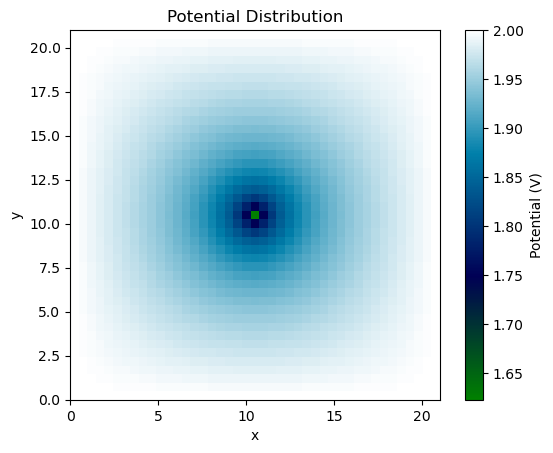

In [117]:
import numpy as np
import matplotlib.pyplot as plt
Lx, Ly = 21, 21
dx=dy=0.5
V_boundary=2
tolerance=1e-4
epsilon_0=8.854e-12
C=2 
Nx=int(Lx/dx) + 1
Ny=int(Ly/dy) + 1
V=np.zeros((Nx, Ny))
rho=np.zeros((Nx, Ny))
central_i=Nx//2
central_j=Ny//2
rho[central_i, central_j]=C/(dx*dy)  
V[:, 0]=V_boundary  
V[:, -1]=V_boundary  
V[0, :]=V_boundary  
V[-1, :]=V_boundary  
iterations=0
sum_difference=tolerance
while sum_difference>=tolerance:
    sum_difference=0
    V_old=V.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            V[i, j] = 0.25*(V_old[i+1, j]+V[i-1, j]+V_old[i, j+1]+V[i, j-1] -(dx*dy)**2*rho[i, j])
            sum_difference+=abs(V[i, j]-V_old[i,j])
    iterations += 1

print(f"Converged after {iterations} iterations with a sum difference of {sum_difference:.5e}")

plt.imshow(V, extent=[0, Lx, 0, Ly], origin='lower', cmap="ocean")
plt.colorbar(label='Potential (V)')
plt.title('Potential Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


For Gauss-Seidel 2098 iterations with a sum difference of 9.97696e-05 was needed. This graph above shows the electric potential distribution. 
For the next part successive overrelaxation approach (SOR) was used. The Successive Over-Relaxation (SOR) method is an extension of the Gauss-Seidel method that aims to accelerate the convergence of iterative solutions to linear systems of equations. SOR introduces a relaxation factor ω, which is a value between 0 and 2, to modify the updates of the variables. By appropriately choosing ω, the method can potentially reduce the number of iterations needed to achieve convergence compared to the standard Gauss-Seidel approach.
In the Gauss-Seidel method, the potential at each grid point is updated using the most recently computed values from neighboring points. The SOR method builds upon this idea by introducing the relaxation factor ωω into the update formula:

$$V[i, j]^{n+1} = (1-ω)V[i, j]+\frac{1}{4} \left( V[i+1, j]^n + V[i-1, j]^{n+1} + V[i, j+1]^n + V[i, j-1]^{n+1} +h^2\rho_{ij} \right)$$
ω was set to be 1.8

SOR converged after 252 iterations with a sum difference of 9.56041e-05


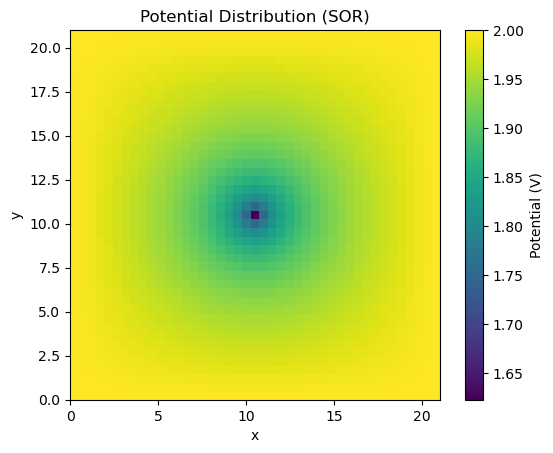

In [118]:
import numpy as np
import matplotlib.pyplot as plt

Lx, Ly =21, 21
dx = dy = 0.5
V_boundary = 2
tolerance = 1e-4
epsilon_0 = 8.854e-12  # Permittivity of free space
C = 2  # Charge in Coulombs
omega =1.8# Relaxation factor for SORplt.show()(central charge)


# Calculate the number of grid points
Nx = int(Lx / dx) + 1
Ny = int(Ly / dy) + 1

# Initialize the potential grid
V = np.zeros((Nx, Ny))

# Initialize the charge density
rho = np.zeros((Nx, Ny))
central_i = Nx // 2
central_j = Ny // 2
rho[central_i, central_j] = C / (dx * dy)  # Charge density at the central site

# Set boundary condition/ epsilon_0s
V[:, 0] = V_boundary  # left boundary
V[:, -1] = V_boundary  # right boundary
V[0, :] = V_boundary  # top boundary
V[-1, :] = V_boundary  # bottom boundary

# Perform SOR iterations
iterations_sor = 0
sum_difference_sor = tolerance
while sum_difference_sor >= tolerance:
    sum_difference_sor = 0
    V_old = V.copy()
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            V[i, j] = (1 - omega) * V_old[i,j] + omega * 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1] - (dx * dy) ** 2 * rho[i, j])
            sum_difference_sor += abs(V[i, j] - V_old[i,j])
    iterations_sor += 1

print(f"SOR converged after {iterations_sor} iterations with a sum difference of {sum_difference_sor:.5e}")

# Plot the final potential
plt.imshow(V, extent=[0, Lx, 0, Ly], origin='lower')
plt.colorbar(label='Potential (V)')
plt.title('Potential Distribution (SOR)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

252 iterations was enough for SOR Algorithm. After that, every method was compared to each other.

Configuration a (no charges):
Jacobi: 3958 iterations
Gauss-Seidel: 2104 iterations
SOR: 349 iterations
Configuration b (central charge):
Jacobi: 3946 iterations
Gauss-Seidel: 2098 iterations
SOR: 348 iterations


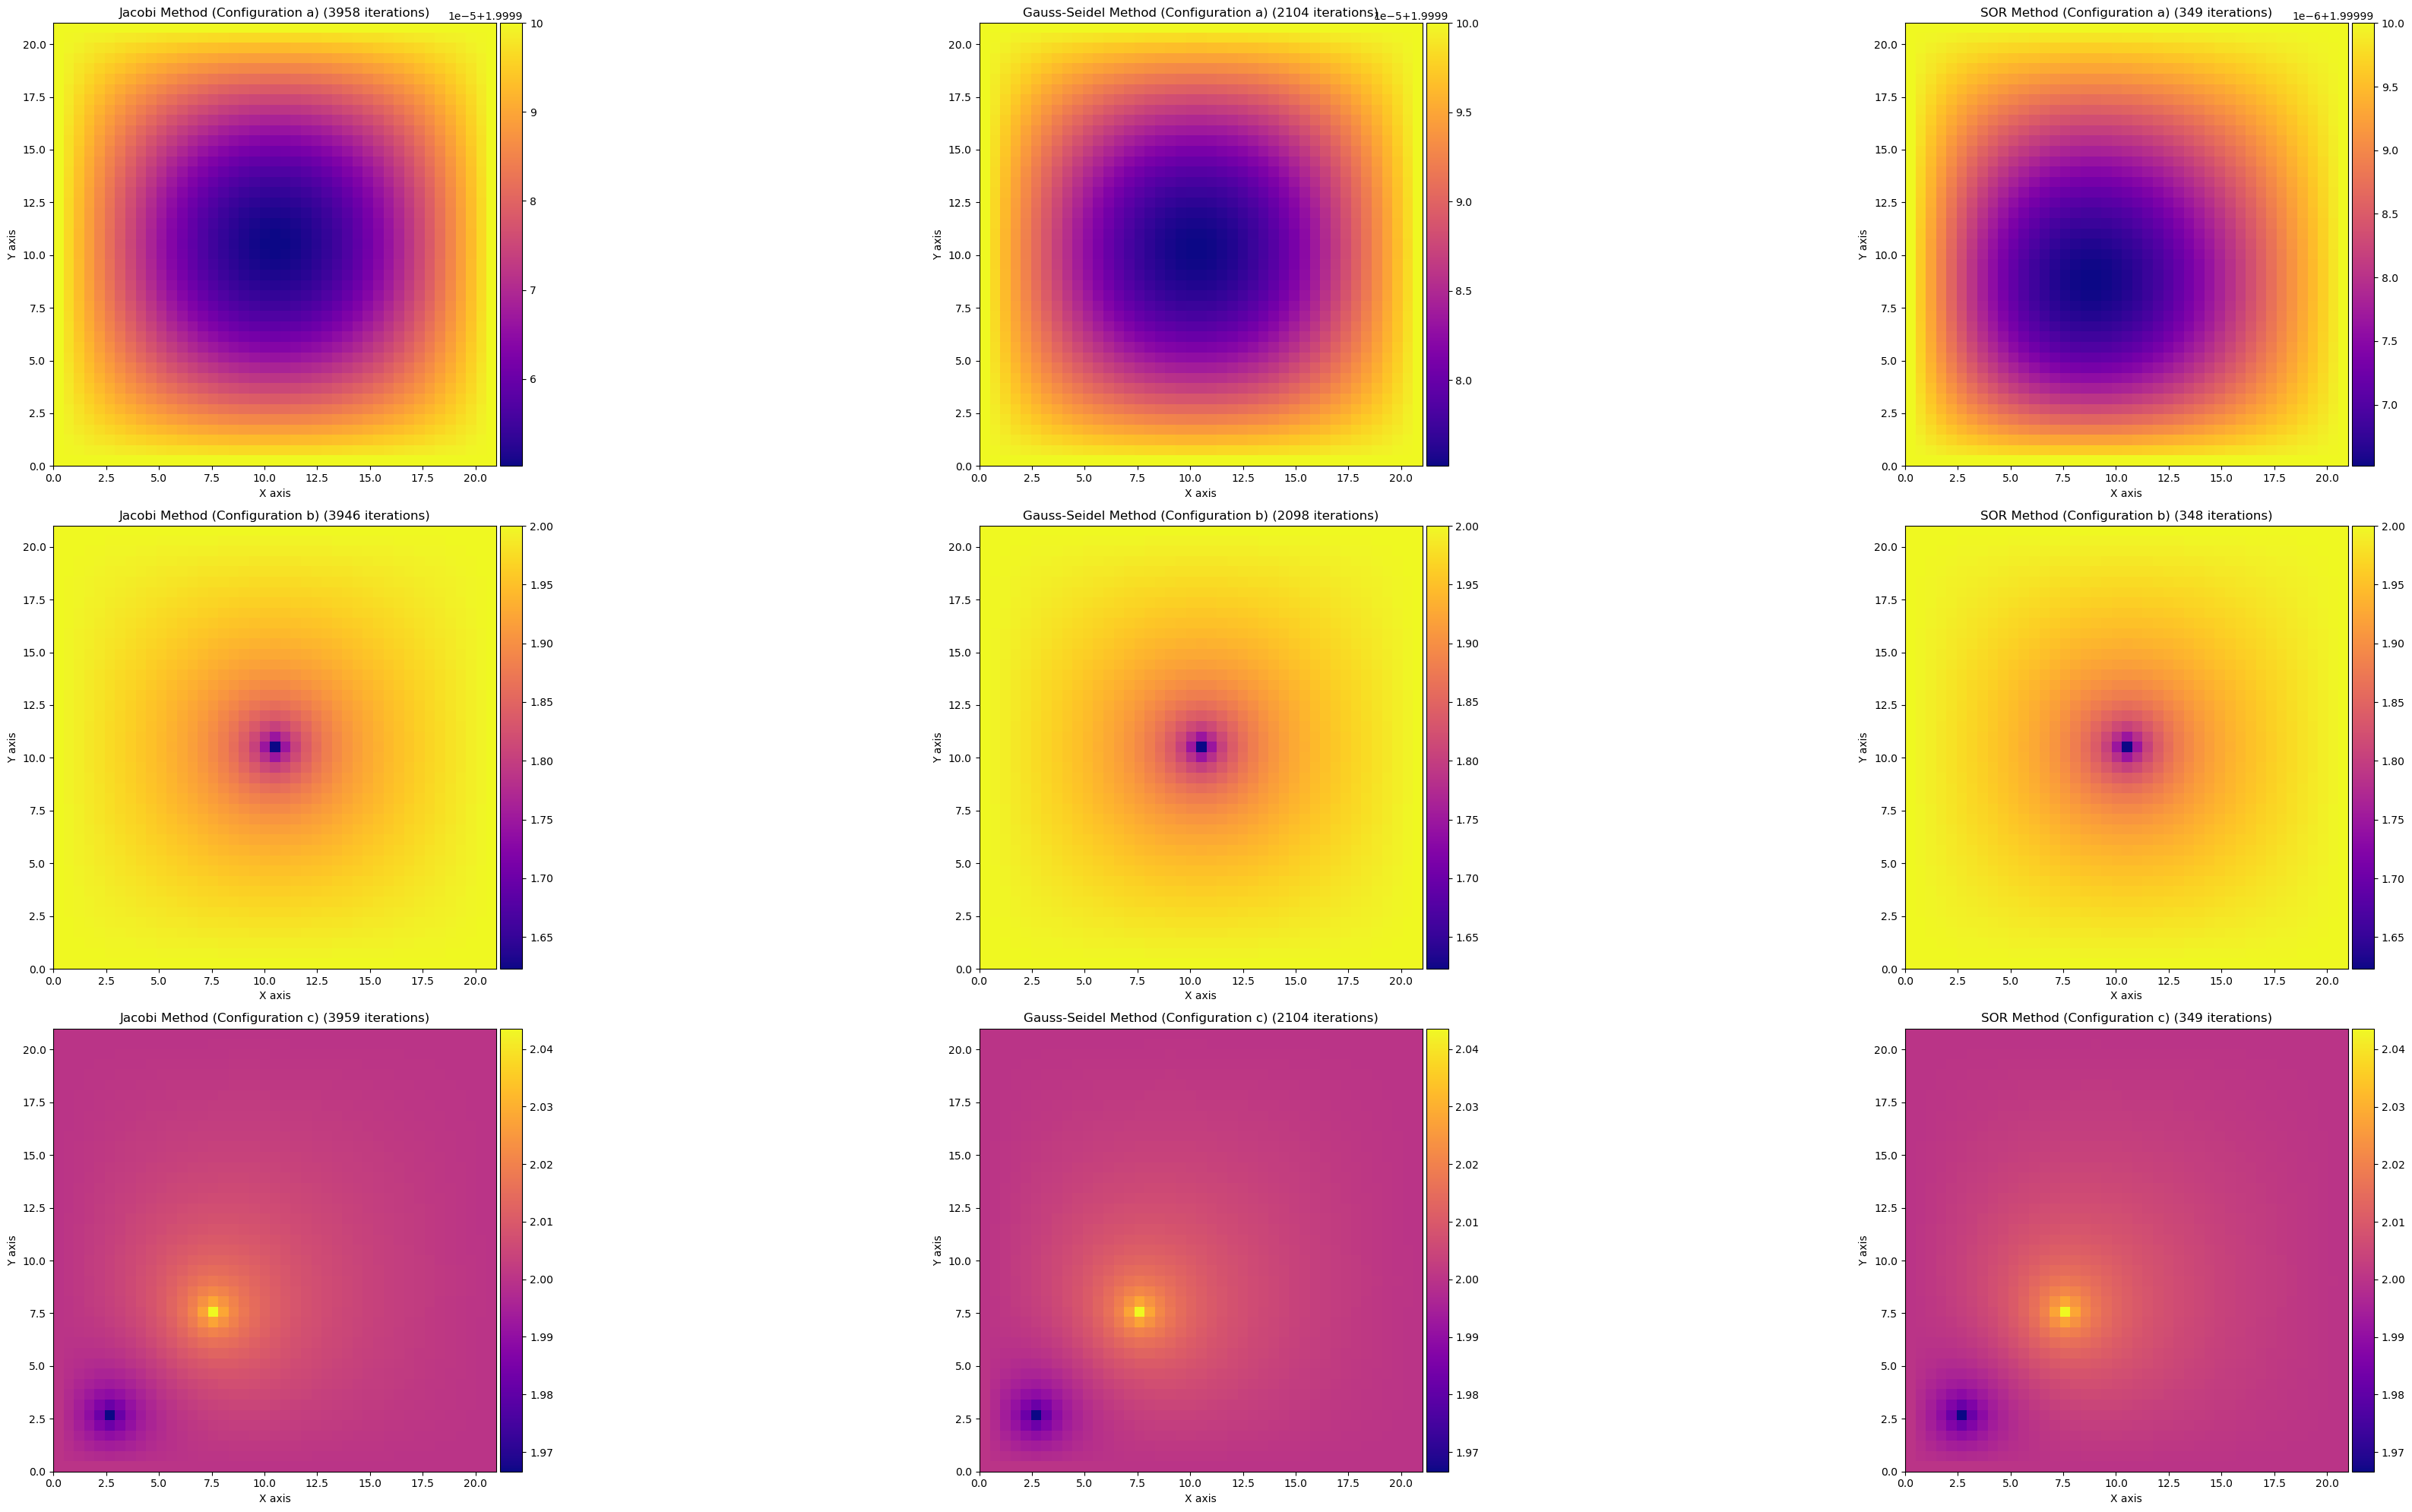

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import sys


Lx, Ly = 21, 21
dx = dy = 0.5
V_boundary = 2
tolerance = 1e-4
epsilon_0 = 8.854e-12 
C = 2  
omega = 2/(1+np.pi/21)  

Nx = int(Lx / dx) + 1
Ny = int(Ly / dy) + 1

# Function to initialize the grid and charge density
def initialize():
    V = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    central_i = Nx // 2
    central_j = Ny // 2
    rho[central_i, central_j] = C / (dx * dy)  # Charge density at the central site

    # Set boundary conditions
    V[:, 0] = V_boundary  # left boundary
    V[:, -1] = V_boundary  # right boundary
    V[0, :] = V_boundary  # top boundary
    V[-1, :] = V_boundary  # bottom boundary
    return V, rho
def initialize_sor():
    V = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    central_i = Nx // 2
    central_j = Ny // 2
    rho[central_i, central_j] = C / (dx * dy)  # Charge density at the central site

    # Set boundary conditions
    V[:, 0] = V_boundary  # left boundary
    V[:, -1] = V_boundary  # right boundary
    V[0, :] = V_boundary  # top boundary
    V[-1, :] = V_boundary  # bottom boundary
    return V, rho

def rand_initialize():
    V = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    rho[5, 5] = 1  # Charge density at a random position
    rho[15, 15] = -1 # Charge density at another random position
    
    # Set boundary conditions
    V[:, 0] = V_boundary  # left boundary
    V[:, -1] = V_boundary  # right boundary
    V[0, :] = V_boundary  # top boundary
    V[-1, :] = V_boundary  # bottom boundary
    return V, rho
def rand_initialize_sor():
    V = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    rho[5, 5] = 1  # Charge density at a random position
    rho[15, 15] = -1 # Charge density at another random position
    
    # Set boundary conditions
    V[:, 0] = V_boundary  # left boundary
    V[:, -1] = V_boundary  # right boundary
    V[0, :] = V_boundary  # top boundary
    V[-1, :] = V_boundary  # bottom boundary
    return V, rho

    
def rand_initialize():
    V = np.zeros((Nx, Ny))
    rho = np.zeros((Nx, Ny))
    rho[5, 5] = 1  # Charge density at a random position
    rho[15, 15] = -1 # Charge density at another random position
    
    # Set boundary conditions
    V[:, 0] = V_boundary  # left boundary
    V[:, -1] = V_boundary  # right boundary_sor
    V[0, :] = V_boundary  # top boundary
    V[-1, :] = V_boundary  # bottom boundary
    return V, rho


# Function to perform Jacobi iterations
def jacobi(V, rho, dx, dy, epsilon_0, tolerance):
    iterations = 0
    sum_differences = []
    sum_difference = tolerance
    while sum_difference >= tolerance:
        V_new = V.copy()
        sum_difference = 0
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                V_new[i, j] = 0.25 * (V[i+1, j] + V[i-1, j] + V[i, j+1] + V[i, j-1] - (dx * dy) ** 2 * rho[i, j])
                sum_difference += abs(V_new[i, j] - V[i, j])
        V = V_new
        iterations += 1
        sum_differences.append(sum_difference)
    return iterations, sum_differences, V

# Function to perform Gauss-Seidel iterations
def gauss_seidel(V, rho, dx, dy, epsilon_0, tolerance):
    iterations = 0
    sum_differences = []
    sum_difference = tolerance
    while sum_difference >= tolerance:
        V_old = V.copy()
        sum_difference = 0
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                V[i, j] = 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1] - (dx * dy) ** 2 * rho[i, j])
                sum_difference += abs(V[i, j] - V_old[i, j])
        iterations += 1
        sum_differences.append(sum_difference)
    return iterations, sum_differences, V

# Function to perform SOR iterations
def sor(V, rho, dx, dy, epsilon_0, omega, tolerance):
    iterations = 0
    sum_differences = []
    sum_difference = tolerance
    while sum_difference >= tolerance:
        V_old = V.copy()
        sum_difference = 0
        for i in range(1, Nx-1):
            for j in range(1, Ny-1):
                V[i, j] = (1 - omega) * V_old[i,j] + omega * 0.25 * (V_old[i+1, j] + V[i-1, j] + V_old[i, j+1] + V[i, j-1] - (dx * dy) ** 2 * rho[i, j])
                sum_difference += abs(V[i, j] - V_old[i,j])
        iterations += 1
        sum_differences.append(sum_difference)
    return iterations, sum_differences, V

# Initialize grids and charge densities
V_init, rho = initialize()
V_init_sor, rho = initialize_sor()

# Compare methods for configuration a (no charges)

iterations_jacobi_a, sum_differences_jacobi_a, V_jacob = jacobi(V_init, np.zeros((Nx, Ny)), dx, dy, epsilon_0, tolerance)
iterations_gauss_seidel_a, sum_differences_gauss_seidel_a, V_gauss = gauss_seidel(V_init, np.zeros((Nx, Ny)), dx, dy, epsilon_0, tolerance)
iterations_sor_a, sum_differences_sor_a, V_sor = sor(V_init_sor, np.zeros((Nx, Ny)), dx, dy, epsilon_0, omega, tolerance)

print(f"Configuration a (no charges):")
print(f"Jacobi: {iterations_jacobi_a} iterations")
print(f"Gauss-Seidel: {iterations_gauss_seidel_a} iterations")
print(f"SOR: {iterations_sor_a} iterations")

# Initialize grids and charge densities for configuration b
V_init, rho = initialize()
V_init_sor, rho_sor = initialize_sor()

# Compare methods for configuration b (central charge)
iterations_jacobi_b, sum_differences_jacobi_b, V_jacob_rho = jacobi(V_init.copy(), rho, dx, dy, epsilon_0, tolerance)
iterations_gauss_seidel_b, sum_differences_gauss_seidel_b, V_gauss_rho = gauss_seidel(V_init, rho, dx, dy, epsilon_0, tolerance)
iterations_sor_b, sum_differences_sor_b, V_sor_rho = sor(V_init_sor, rho_sor, dx, dy, epsilon_0, omega, tolerance)

print(f"Configuration b (central charge):")
print(f"Jacobi: {iterations_jacobi_b} iterations")
print(f"Gauss-Seidel: {iterations_gauss_seidel_b} iterations")
print(f"SOR: {iterations_sor_b} iterations")

# Plotting functions
def plot_potential(ax, V, title, iterations):
    im = ax.imshow(V, origin='lower', extent=(0, Lx, 0, Ly), cmap='plasma')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    ax.set_title(f'{title} ({iterations} iterations)')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')

# Plotting results for configuration a (no charges)
fig, axes = plt.subplots(3, 3, figsize=(40, 20))

plot_potential(axes[0,0], V_jacob, "Jacobi Method (Configuration a)", iterations_jacobi_a)
plot_potential(axes[0,1], V_gauss, "Gauss-Seidel Method (Configuration a)", iterations_gauss_seidel_a)
plot_potential(axes[0,2], V_sor, "SOR Method (Configuration a)", iterations_sor_a)

# Plotting results for configuration b (central charge)
plot_potential(axes[1,0], V_jacob_rho, "Jacobi Method (Configuration b)", iterations_jacobi_b)
plot_potential(axes[1,1], V_gauss_rho, "Gauss-Seidel Method (Configuration b)", iterations_gauss_seidel_b)
plot_potential(axes[1,2], V_sor_rho, "SOR Method (Configuration b)", iterations_sor_b)

# Initialize grids and charge densities for configuration c (random charges)
V_init, rho_rand = rand_initialize()
V_init_sor, rho_rand_sor= rand_initialize_sor()


# Compare methods for configuration c (random charges)
iterations_jacobi_c, sum_differences_jacobi_c, V_jacob_rand = jacobi(V_init.copy(), rho_rand, dx, dy, epsilon_0, tolerance)
iterations_gauss_seidel_c, sum_differences_gauss_seidel_c, V_gauss_rand = gauss_seidel(V_init, rho_rand, dx, dy, epsilon_0, tolerance)
iterations_sor_c, sum_differences_sor_c, V_sor_rand = sor(V_init_sor, rho_rand_sor, dx, dy, epsilon_0, omega, tolerance)

plot_potential(axes[2,0], V_jacob_rand, "Jacobi Method (Configuration c)", iterations_jacobi_c)
plot_potential(axes[2,1], V_gauss_rand, "Gauss-Seidel Method (Configuration c)", iterations_gauss_seidel_c)
plot_potential(axes[2,2], V_sor_rand, "SOR Method (Configuration c)", iterations_sor_c)

plt.tight_layout()
plt.show()


For the Jacobi Method, Configuration (a) reaches a solution in 3958 iterations. The heatmap shows a smooth gradient centered at the middle, indicating a relatively slow convergence with a high number of iterations. Configuration (b) reaches a solution in 3946 iterations, also exhibiting a centered gradient but requiring slightly more iterations. Configuration (c) converges in 3959 iterations, with a slightly different contour pattern that includes a small gradient difference in the central region caused by our innitial conditions which was +1 and -1 charges at some points.

In the Gauss-Seidel Method, Configuration (a) requires 2104 iterations which is significantly fewer than the Jacobi method, which demonstrates faster convergence. The gradient resembles the Jacobi Method's result but is achieved more efficiently. Configuration (b) reaches a solution in 2098 iterations, again faster than the Jacobi Method, confirming Gauss-Seidel's efficiency. Configuration (c) converges in 2104 iterations, showing a similar gradient structure to Configuration (a) but with distinct central and peripheral differences because of again, initial conditions.

The SOR Method is the fastest, with Configuration (a) converging in just 349 iterations. This rapid convergence shows the efficiency of SOR, especially for smoother gradients. Configuration (b) also converges quickly in 348 iterations, presenting a central gradient similar to the Gauss-Seidel result but achieved more efficiently. Configuration (c) requires 349 iterations, with a contour pattern consistent with Configurations (a) and (b), highlighting the SOR method's effectiveness.